In [1]:
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np

/var/folders/d3/r414kbwd72g3nnhvylz22y9m0000gp/T/ipykernel_60170/391938466.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
#Casita
#df = pd.read_excel(r"C:\Users\nunez\OneDrive\Escritorio\Bases\base_2012_2022_limpia.xlsx")

#MacOS
df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")

df["TIPO_OBRA"] = df["TIPO_OBRA"].astype(str)
#df = df[df["TIPO_OBRA"] == "1"]

GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))
boundary = unary_union(geojson["geometry"]).exterior
joined = gpd.sjoin(gdf, geojson, op='within')
points_within_boundary = joined[joined.index_right.notnull()]
points_within_boundary["TIPO_OBRA"] = points_within_boundary["TIPO_OBRA"].astype(str)
df = points_within_boundary

#clean_df = clean_df[(clean_df["USO_1"] == "VIVIENDA UNIFAMILIAR") | (clean_df["USO_1"] == "VIVIENDA MULTIFAMILIAR")]
df = df[df["TIPO_OBRA"] == "3"]
df
#clean_df = clean_df[clean_df["USO_1"] == "LOCAL COMERCIAL"]

/Users/santi/miniconda3/lib/python3.10/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/santi/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/d3/r414kbwd72g3nnhvylz22y9m0000gp/T/ipykernel_60170/2118885931.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  ANIO MES  TRIMESTRE  \
7                 7           7.0          14  2022   2        1.0   
8                 8           8.0          14  2022   2        1.0   
10               10          10.0          15  2022   3        1.0   
11               11          11.0          15  2022   3        1.0   
12               12          12.0          16  2022   1        1.0   
...             ...           ...         ...   ...  ..        ...   
24296         20373           NaN       16821  2016   2        1.0   
24298         20375           NaN       16822  2017   7        3.0   
24300         20377           NaN       16823  2012   4        2.0   
24301         20378           NaN       16824  2016   5        2.0   
24302         20379           NaN       16825  2019   3        1.0   

                     FECHA                      DIRECCION TIPO_OBRA  \
7               7 feb 2022  TREINTA Y TRES ORIENTALES 193         3   
8               7 feb 2022  TREINTA Y TRES ORIENTALES 193         3   
10             22 mar 2022            RIO DE JANEIRO 1033         3   
11             22 mar 2022            RIO DE JANEIRO 1033         3   
12             26 ene 2022                   PRINGLES 707         3   
...                    ...                            ...       ...   
24296             00:00:00              TRES ARROYOS 1976         3   
24298  2017-07-14 00:00:00              TRES ARROYOS 2084         3   
24300  2012-04-24 00:00:00              TRES ARROYOS 2131         3   
24301  2016-05-12 00:00:00              TRES ARROYOS 2450         3   
24302  2019-03-21 00:00:00              TRES ARROYOS 2450         3   

      TIPO_OBRA_CUR  ...                                                add  \
7         SIN DATOS  ...  TREINTA Y TRES ORIENTALES 193 ALMAGRO Buenos A...   
8         SIN DATOS  ...  TREINTA Y TRES ORIENTALES 193 ALMAGRO Buenos A...   
10        SIN DATOS  ...  RIO DE JANEIRO 1033 ALMAGRO Buenos Aires, Arge...   
11        SIN DATOS  ...  RIO DE JANEIRO 1033 ALMAGRO Buenos Aires, Arge...   
12       OBRA MAYOR  ...       PRINGLES 707 ALMAGRO Buenos Aires, Argentina   
...             ...  ...                                                ...   
24296     SIN DATOS  ...                                                NaN   
24298     SIN DATOS  ...                                                NaN   
24300     SIN DATOS  ...                                                NaN   
24301     SIN DATOS  ...                                                NaN   
24302     SIN DATOS  ...                                                NaN   

      location                                            address  \
7          7.0  TREINTA Y TRES ORIENTALES 193 ALMAGRO Buenos A...   
8          8.0  TREINTA Y TRES ORIENTALES 193 ALMAGRO Buenos A...   
10        10.0  RIO DE JANEIRO 1033 ALMAGRO Buenos Aires, Arge...   
11        11.0  RIO DE JANEIRO 1033 ALMAGRO Buenos Aires, Arge...   
12        12.0       PRINGLES 707 ALMAGRO Buenos Aires, Argentina   
...        ...                                                ...   
24296      NaN                                                NaN   
24298      NaN                                                NaN   
24300      NaN                                                NaN   
24301      NaN                                                NaN   
24302      NaN                                                NaN   

                          geometry index_right             BARRIO  \
7      POINT (-58.42456 -34.61579)           4            ALMAGRO   
8      POINT (-58.42456 -34.61579)           4            ALMAGRO   
10     POINT (-58.43257 -34.60349)           4            ALMAGRO   
11     POINT (-58.43257 -34.60349)           4            ALMAGRO   
12     POINT (-58.42723 -34.60404)           4            ALMAGRO   
...                            ...         ...                ...   
24296  POINT (-58.46466 -34.61210)          25  VILL

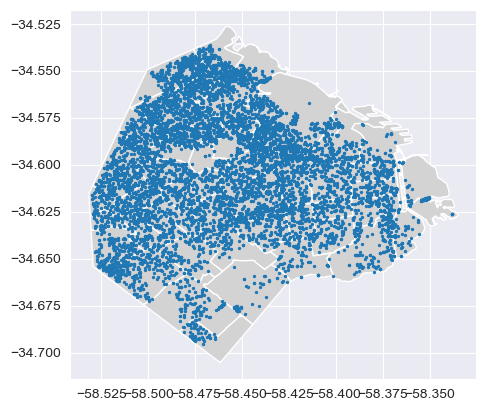

In [3]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
df.plot(ax=ax, markersize=2)
#points_within_boundary.plot(ax=ax, markersize=2)
plt.show()

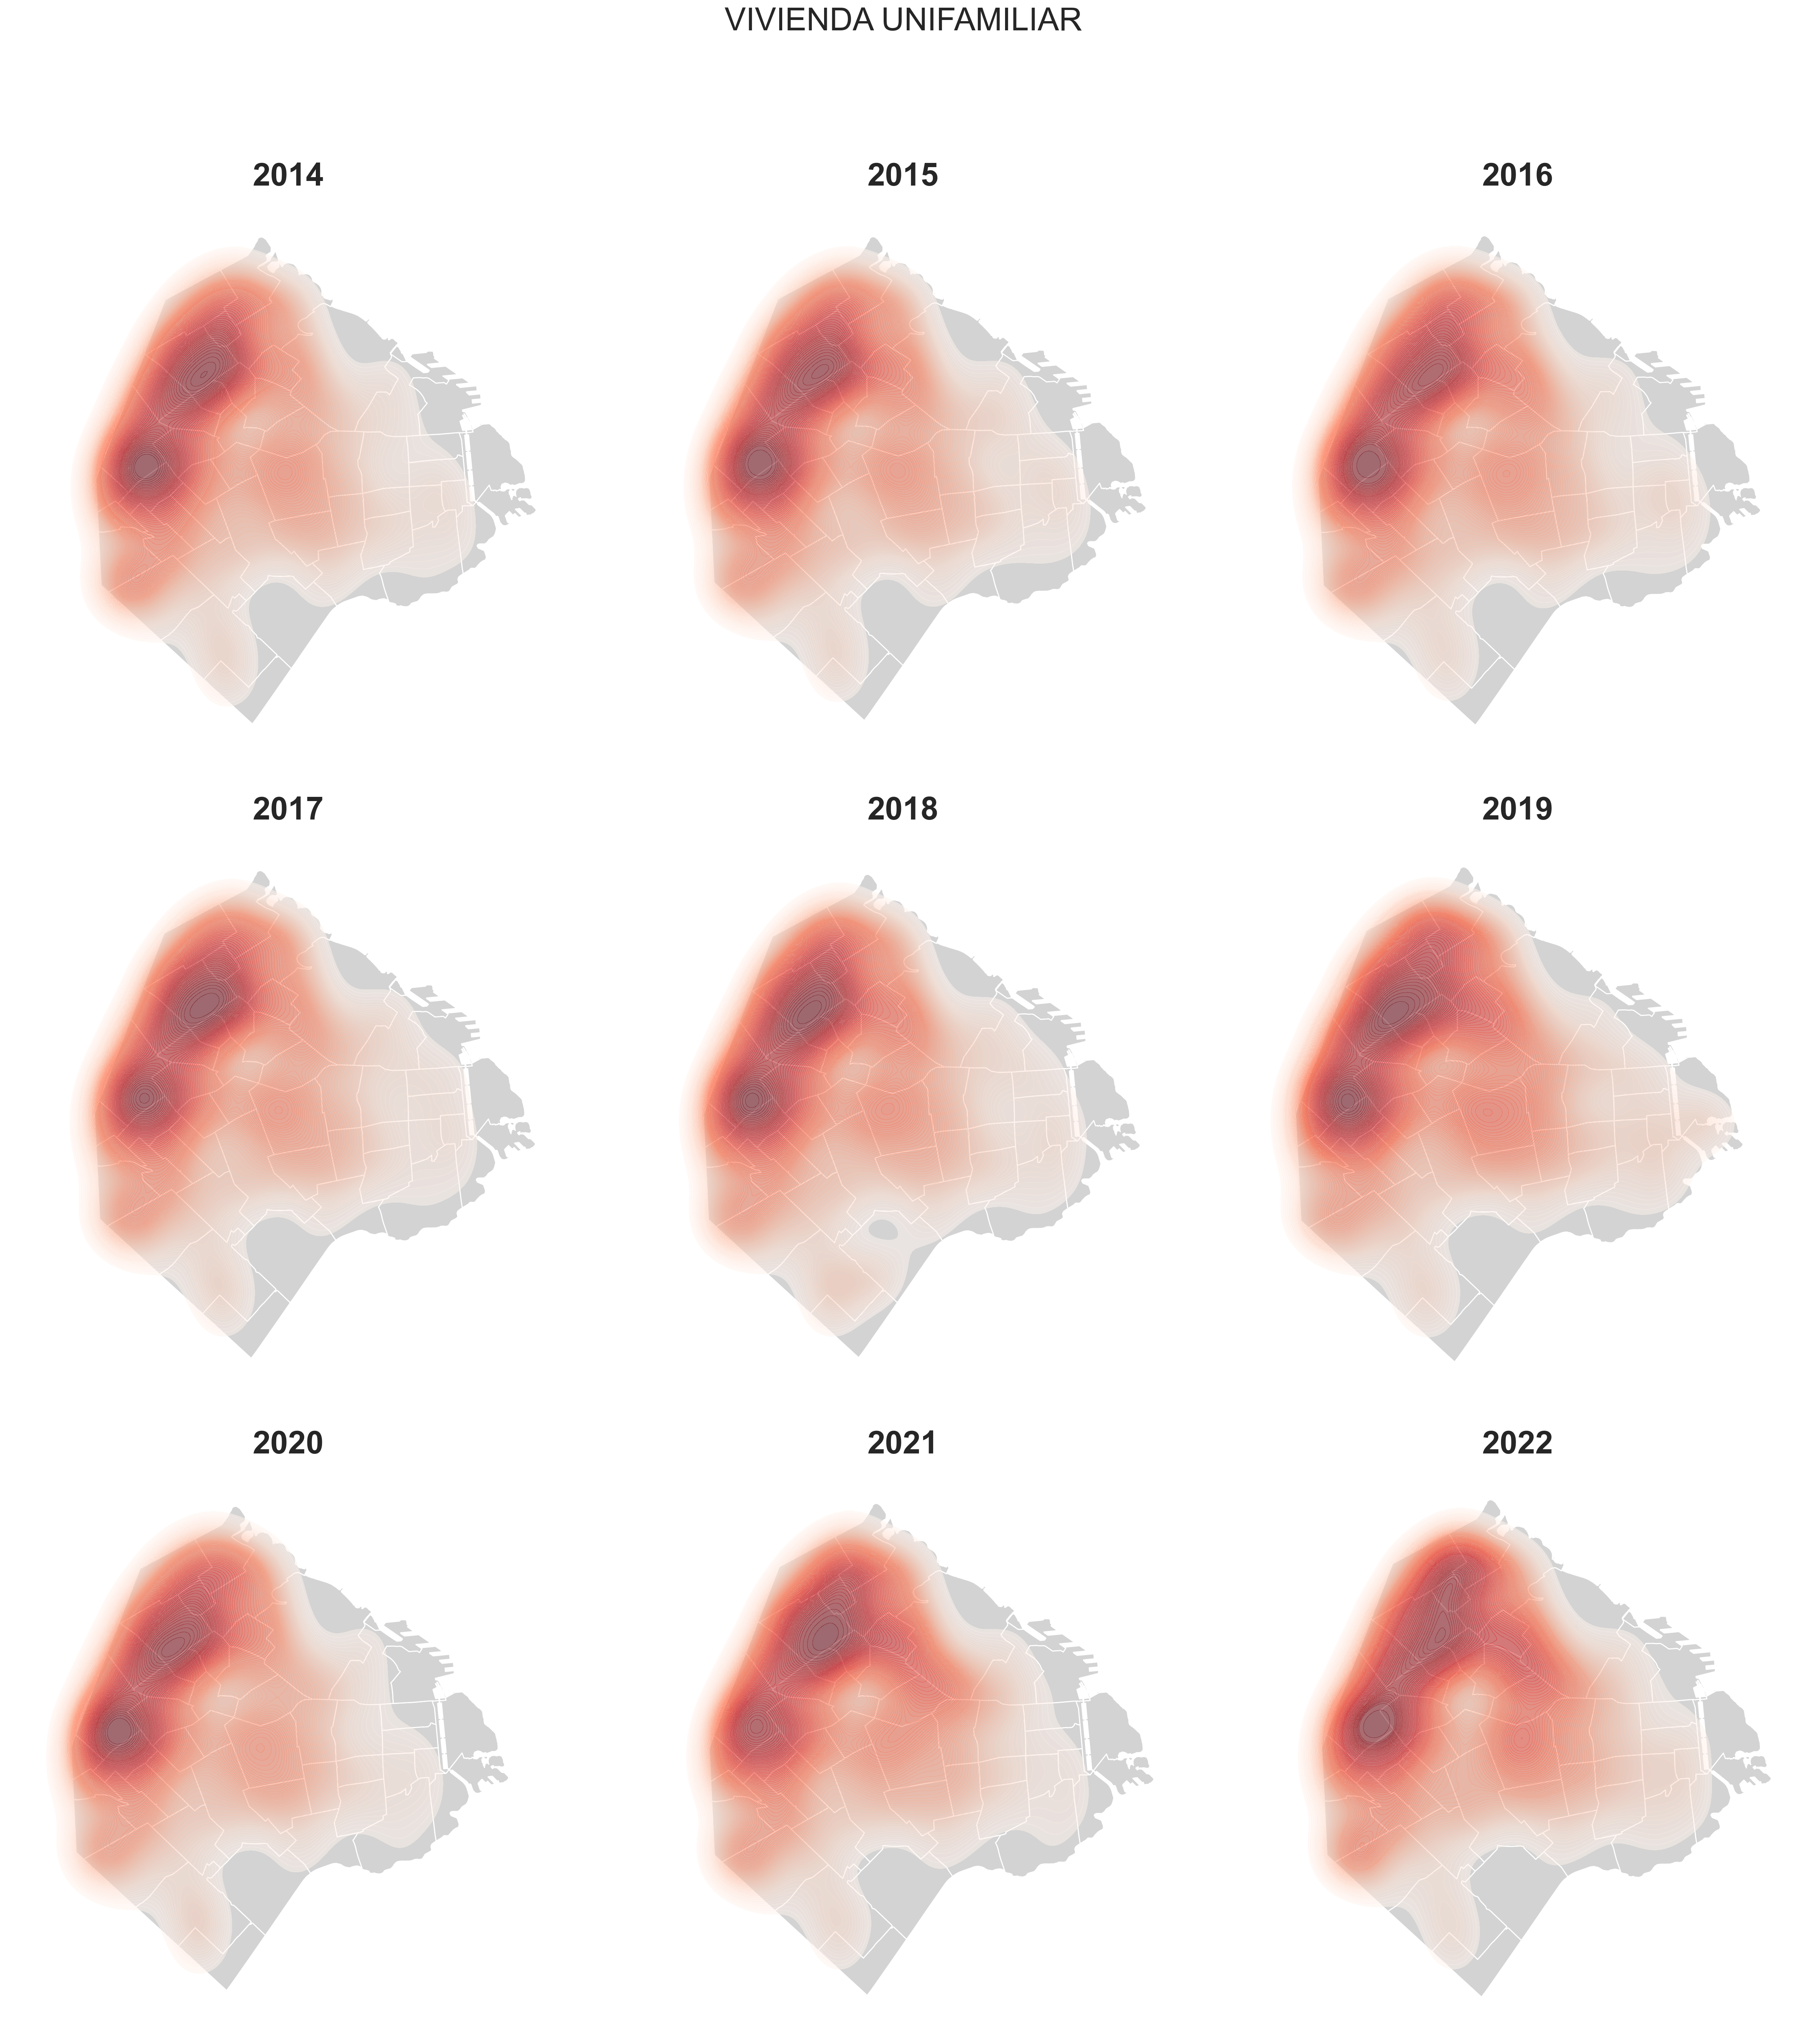

In [4]:
cols=3
rows=3
x= "VIVIENDA UNIFAMILIAR"
años =range(2014,2023)
fig, ax = plt.subplots(rows, cols, figsize=(30, 30), dpi=200)
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
fig.suptitle(x,fontsize=30)
for i,j in zip(range(cols*rows),años):
    ax = plt.subplot(rows,cols,i+1)
    ax.set_axis_off()
    geojson["geometry"].plot(ax=ax, color='lightgrey')
    sns.kdeplot(data=df[(df["USO_1"] == x) | (df["ANIO"] == j)],y="Latitud",x="Longitud",ax=ax,levels=90,
                fill=True,
                alpha=0.5,
                cmap="Reds")
    ax.set_title(label=f"{j}",fontsize=30,fontweight="bold")
plt.show()
#plt.savefig(rf"C:\Users\nunez\OneDrive\Escritorio\mapas\{str(x)}.png")
#plt.close()


In [5]:

for x in tqdm(df["USO_1"].unique()):
    cols=3
    rows=3
    años =range(2014,2023)
    fig, ax = plt.subplots(rows, cols, figsize=(30, 30), dpi=200)
    plt.subplots_adjust(wspace=0, hspace=0.1, left=0.1, right=0.9, bottom=0.1, top=0.9)
    #fig.suptitle(x,fontsize=30)
    for i,j in zip(range(cols*rows),años):
        ax = plt.subplot(rows,cols,i+1)
        ax.set_axis_off()
        geojson["geometry"].plot(ax=ax, color='lightgrey')
        sns.kdeplot(data=df[(df["USO_1"] == x) | (df["ANIO"] == j)],y="Latitud",x="Longitud",ax=ax,levels=90,
                    fill=True,
                    alpha=0.5,
                    cmap="Reds")
        ax.set_title(label=f"{j}",fontsize=30,fontweight="bold")
    plt.savefig(rf"/Users/santi/Desktop/Work/Visualizaciones (imagenes)/Heatmaps MyA/{str(x)}.png", bbox_inches='tight')
    plt.close()

100%|██████████| 30/30 [03:21<00:00,  6.73s/it]
